In [ ]:
!pip install plotly geopandas


In [ ]:
import pandas as pd

users = pd.read_csv('users.csv')
test_results = pd.read_csv('test_results.csv')

# Unir los datos por `user_id`
df = pd.merge(users, test_results, left_on='id', right_on='user_id')


In [ ]:
df.head()

,id_x,username,email,password,work_area,department,branch,entidad_financiera,created_at_x,id_y,user_id,state_score,trait_score,created_at_y
0,1,ana_garcia1,ana.garcia1@bcp.com.bo,hashed_password,Plataforma,La Paz,La Paz Centro,BCP,2020-01-01 08:00:00,1,1,85,90,2020-01-15 09:00:00
1,1,ana_garcia1,ana.garcia1@bcp.com.bo,hashed_password,Plataforma,La Paz,La Paz Centro,BCP,2020-01-01 08:00:00,2,1,78,82,2020-04-15 09:00:00
2,1,ana_garcia1,ana.garcia1@bcp.com.bo,hashed_password,Plataforma,La Paz,La Paz Centro,BCP,2020-01-01 08:00:00,3,1,92,88,2020-07-15 09:00:00
3,1,ana_garcia1,ana.garcia1@bcp.com.bo,hashed_password,Plataforma,La Paz,La Paz Centro,BCP,2020-01-01 08:00:00,4,1,80,85,2020-10-15 09:00:00
4,1,ana_garcia1,ana.garcia1@bcp.com.bo,hashed_password,Plataforma,La Paz,La Paz Centro,BCP,2020-01-01 08:00:00,5,1,87,91,2021-01-15 09:00:00


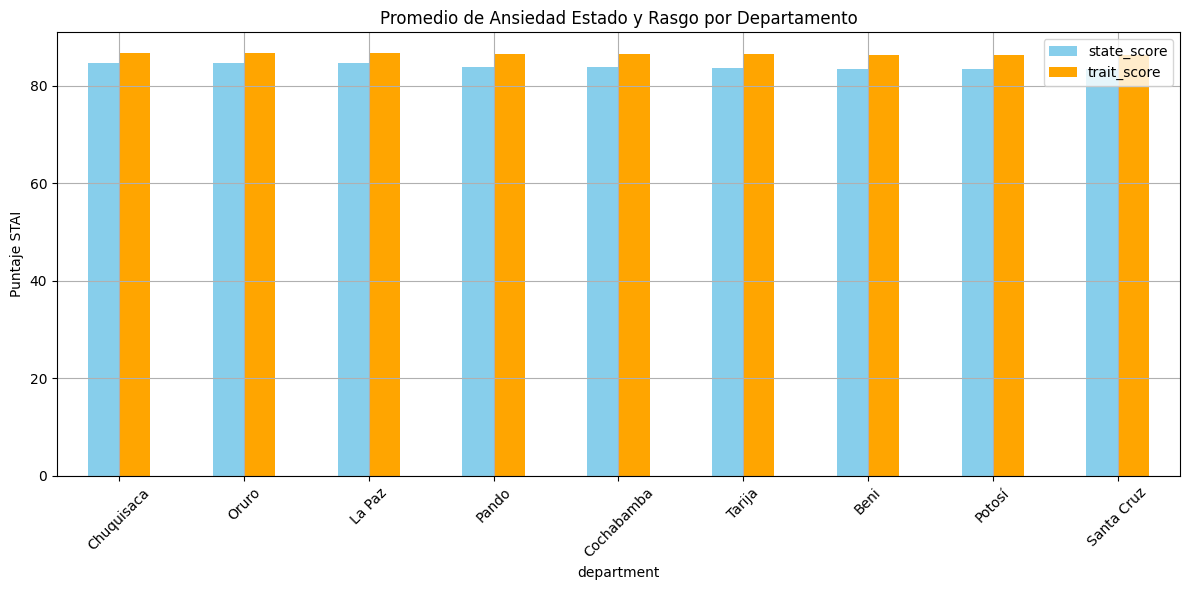

In [ ]:
import matplotlib.pyplot as plt

# Promedio de ansiedad por departamento
departamento_avg = df.groupby('department')[['state_score', 'trait_score']].mean().sort_values(by='state_score', ascending=False)

departamento_avg.plot(kind='bar', figsize=(12,6), color=['skyblue', 'orange'])
plt.title('Promedio de Ansiedad Estado y Rasgo por Departamento')
plt.ylabel('Puntaje STAI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


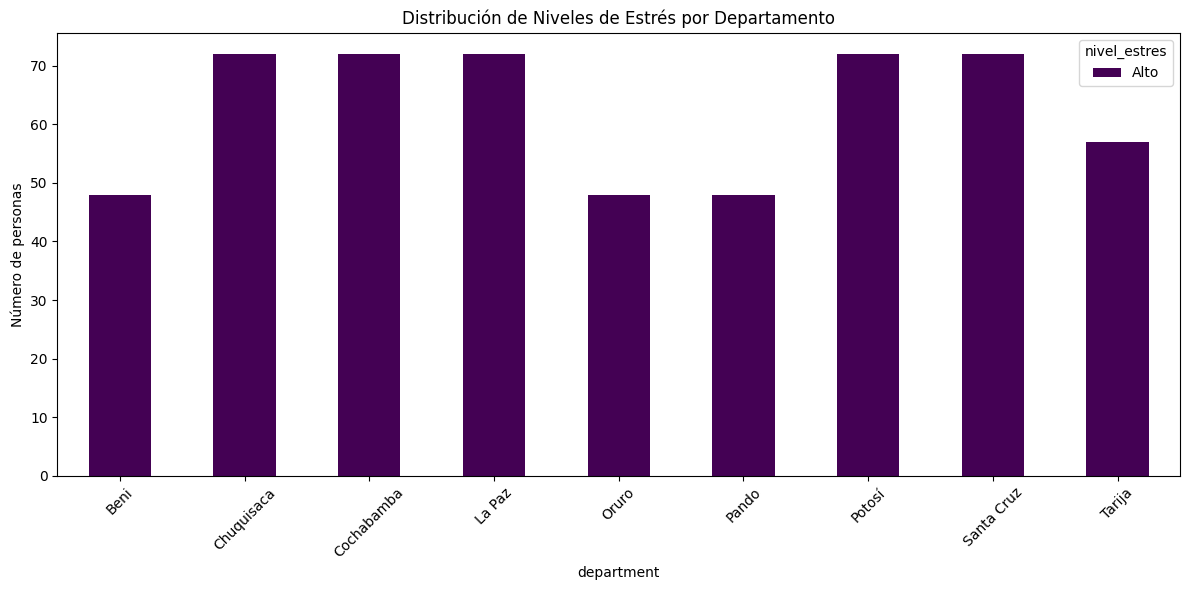

In [ ]:
# Asignar etiqueta de estrés
def clasificar_estres(score):
    if score >= 60:
        return 'Alto'
    elif score >= 40:
        return 'Moderado'
    else:
        return 'Bajo'

df['nivel_estres'] = df['state_score'].apply(clasificar_estres)

estres_por_departamento = df.groupby(['department', 'nivel_estres']).size().unstack().fillna(0)

estres_por_departamento.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Distribución de Niveles de Estrés por Departamento')
plt.ylabel('Número de personas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


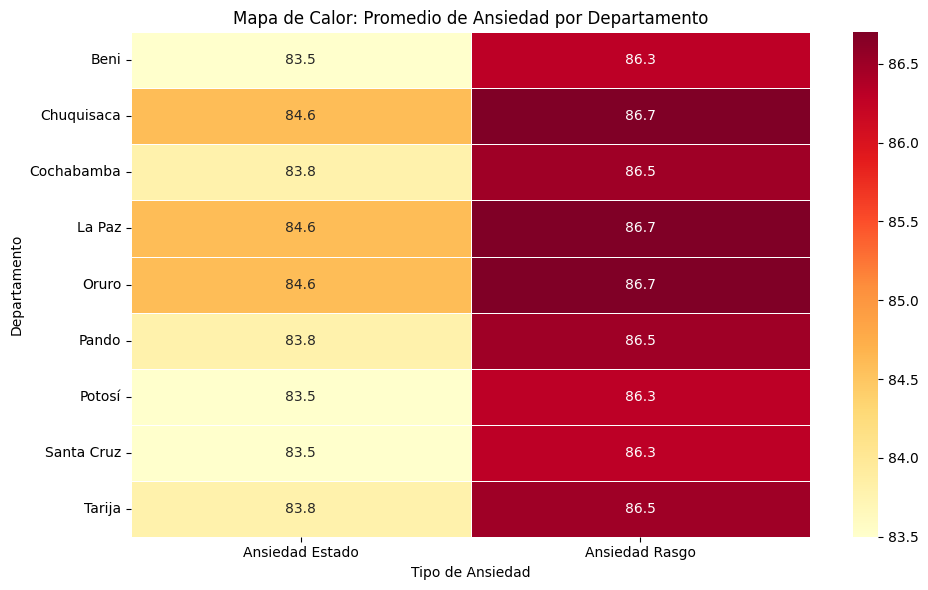

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar: promedio de ansiedad estado y rasgo por departamento
departamento_avg = df.groupby('department')[['state_score', 'trait_score']].mean().round(1)

# Opcional: renombrar columnas
departamento_avg.columns = ['Ansiedad Estado', 'Ansiedad Rasgo']
plt.figure(figsize=(10, 6))
sns.heatmap(departamento_avg, annot=True, cmap='YlOrRd', linewidths=0.5, fmt='.1f')
plt.title('Mapa de Calor: Promedio de Ansiedad por Departamento')
plt.ylabel('Departamento')
plt.xlabel('Tipo de Ansiedad')
plt.tight_layout()
plt.show()


In [ ]:
df.dtypes

,0
id_x,int64
username,object
email,object
password,object
work_area,object
department,object
branch,object
entidad_financiera,object
created_at_x,object
id_y,int64


In [ ]:
pip install folium pandas


In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import random

# Generar datos sintéticos dentro de Bolivia
def generar_datos_bolivia(n=200):
    data = []
    for _ in range(n):
        lat = random.uniform(-22.0, -9.5)    # Límite sur a norte
        lon = random.uniform(-69.6, -57.4)   # Límite oeste a este
        intensidad = random.uniform(0.5, 1.0)
        data.append([lat, lon, intensidad])
    return pd.DataFrame(data, columns=['lat', 'lon', 'intensidad'])

# Crear DataFrame con datos
df = generar_datos_bolivia()

# Crear mapa centrado en Bolivia
mapa = folium.Map(location=[-16.5, -64.0], zoom_start=6, tiles="CartoDB positron")

# Agregar capa de mapa de calor
heat_data = [[row['lat'], row['lon'], row['intensidad']] for _, row in df.iterrows()]
HeatMap(heat_data, radius=15).add_to(mapa)

# Guardar como archivo HTML
mapa.save("mapa_calor_bolivia.html")
print("Mapa guardado como 'mapa_calor_bolivia.html'")


Mapa guardado como 'mapa_calor_bolivia.html'


In [ ]:
pip install folium pandas


In [ ]:
geojson_path = '/path/to/your/file/bolivia_departamentos.geojson'

MSE: 28.100570704297205


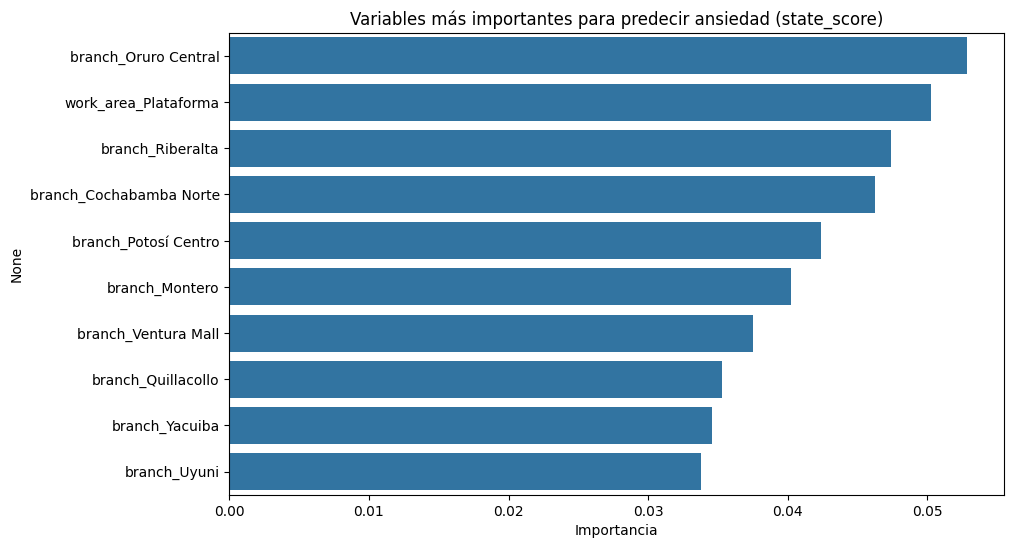

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
# Selección de variables relevantes
features = ['work_area', 'department', 'branch']
target = 'state_score'  # o 'trait_score'
# One-hot encoding
df_encoded = pd.get_dummies(df[features])
# Eliminar filas nulas y separar datos
X = df_encoded
y = df[target]
# Get the index of rows with no missing values in X
idx = X.dropna().index
# Filter both X and y using this index
X, y = X.loc[idx], y.loc[idx]
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Evaluar
y_pred = rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
# Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
# Mostrar las variables más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values[:10], y=importances.index[:10])
plt.title('Variables más importantes para predecir ansiedad (state_score)')
plt.xlabel('Importancia')
plt.show()


In [ ]:
df = pd.read_csv('banking_conversations.csv', quoting=3, escapechar='\\')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Distribución de Sentimientos:
sentiment
positive    65
neutral     34
negative    34
Name: count, dtype: int64


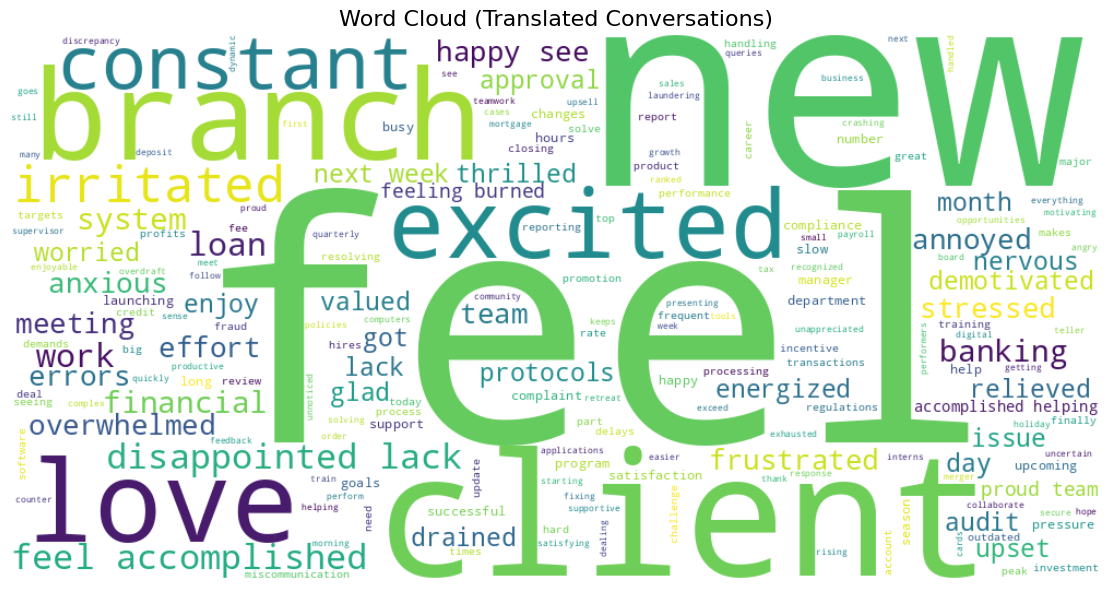

In [ ]:
# Instala dependencias si es necesario:
# !pip install textblob[google]
# !pip install wordcloud
# !pip install seaborn

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# -------------------------
# Cargar datos
# -------------------------
# df = pd.read_csv('tus_conversaciones.csv')

# -------------------------
# Función para traducir texto
# -------------------------
def traducir_a_ingles(texto):
    try:
        return str(TextBlob(texto).translate(to='en'))
    except:
        return texto  # Si falla, se mantiene el texto original

# -------------------------
# Función para limpiar texto
# -------------------------
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))  # porque ya estará en inglés
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

# -------------------------
# Traducción, limpieza y preparación
# -------------------------
df['translated'] = df['conversation'].apply(traducir_a_ingles)
df['cleaned_conversation'] = df['translated'].apply(clean_text)
df['cleaned_conversation'] = df['cleaned_conversation'].apply(remove_short_words)

# -------------------------
# Análisis de sentimientos
# -------------------------
def get_sentiment(text):
    try:
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0:
            return 'positive'
        elif polarity == 0:
            return 'neutral'
        else:
            return 'negative'
    except:
        return 'neutral'

df['sentiment'] = df['cleaned_conversation'].apply(get_sentiment)

# -------------------------
# Distribución de sentimientos
# -------------------------
print("Distribución de Sentimientos:")
print(df['sentiment'].value_counts())

# -------------------------
# Generar nube de palabras traducida
# -------------------------
custom_stopwords = set(STOPWORDS).union({'bank', 'customer', 'service', 'hello', 'thanks'})  # puedes adaptar esto

all_text = ' '.join(df['cleaned_conversation'])

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='viridis',
    max_words=200,
    contour_color='steelblue',
    contour_width=2
).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Translated Conversations)', fontsize=16)
plt.tight_layout()
plt.show()
